In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score

In [3]:
df=pd.read_csv(r'C:\Users\arjun\Downloads\titanic.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.shape

(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [13]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df.drop(['Cabin','Embarked'],axis=1,inplace=True)

In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000


In [16]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [18]:
pd.get_dummies(df['Sex'],drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [19]:
df['Gender']=pd.get_dummies(df['Sex'],drop_first=True)

In [20]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,1


In [22]:
df.select_dtypes('object')

,Name,Sex,Ticket
0,"Braund, Mr. Owen Harris",male,A/5 21171
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803
4,"Allen, Mr. William Henry",male,373450
...,...,...,...
886,"Montvila, Rev. Juozas",male,211536
887,"Graham, Miss. Margaret Edith",female,112053
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607
889,"Behr, Mr. Karl Howell",male,111369


In [25]:
df.drop(df.select_dtypes('object'),axis=1,inplace=True)

In [26]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.000000,1,0,7.2500,1
1,2,1,1,38.000000,1,0,71.2833,0
2,3,1,3,26.000000,0,0,7.9250,0
3,4,1,1,35.000000,1,0,53.1000,0
4,5,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,1
887,888,1,1,19.000000,0,0,30.0000,0
888,889,0,3,29.699118,1,2,23.4500,0
889,890,1,1,26.000000,0,0,30.0000,1


# EDA

<Axes: xlabel='Survived', ylabel='count'>

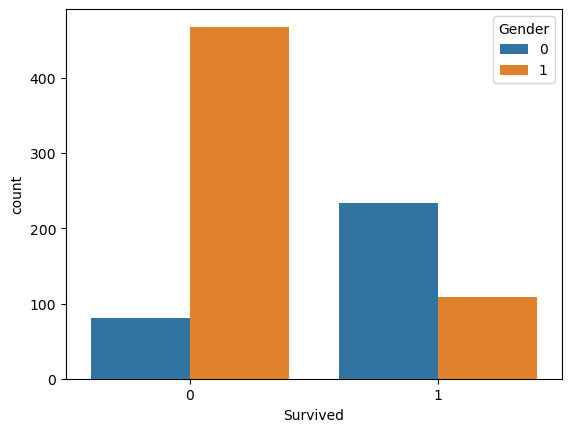

In [28]:
sns.countplot(data=df,x='Survived',hue='Gender')

<Axes: xlabel='Age', ylabel='Fare'>

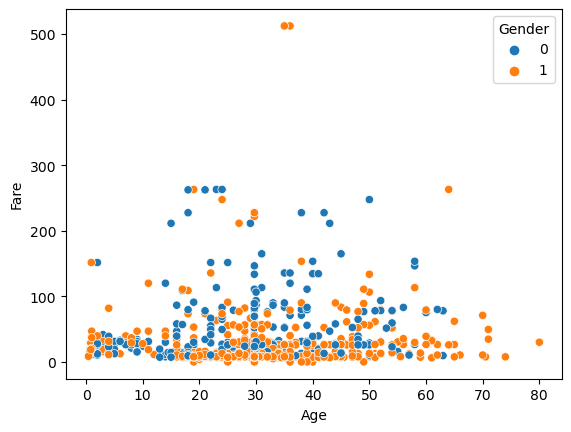

In [30]:
sns.scatterplot(x='Age',y='Fare',hue='Gender',data=df)

In [31]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.000000,1,0,7.2500,1
1,2,1,1,38.000000,1,0,71.2833,0
2,3,1,3,26.000000,0,0,7.9250,0
3,4,1,1,35.000000,1,0,53.1000,0
4,5,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,1
887,888,1,1,19.000000,0,0,30.0000,0
888,889,0,3,29.699118,1,2,23.4500,0
889,890,1,1,26.000000,0,0,30.0000,1


In [32]:
X=df.drop('Survived',axis=1)

In [33]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,3,22.000000,1,0,7.2500,1
1,2,1,38.000000,1,0,71.2833,0
2,3,3,26.000000,0,0,7.9250,0
3,4,1,35.000000,1,0,53.1000,0
4,5,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,1
887,888,1,19.000000,0,0,30.0000,0
888,889,3,29.699118,1,2,23.4500,0
889,890,1,26.000000,0,0,30.0000,1


In [35]:
y=df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=710)

In [49]:
len(X_train)

712

In [50]:
len(X_test)

179

In [51]:
model=LogisticRegression()

In [52]:
model.fit(X_train,y_train)

C:\Users\arjun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
model.score(X_test,y_test)

0.8770949720670391

In [54]:
y_pred=model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [55]:
y_test

49     0
143    0
830    1
90     0
270    0
      ..
714    0
355    0
104    0
28     1
536    0
Name: Survived, Length: 179, dtype: int64

In [56]:
confusion_matrix(y_test,y_pred)

array([[98, 12],
       [10, 59]], dtype=int64)

<Axes: >

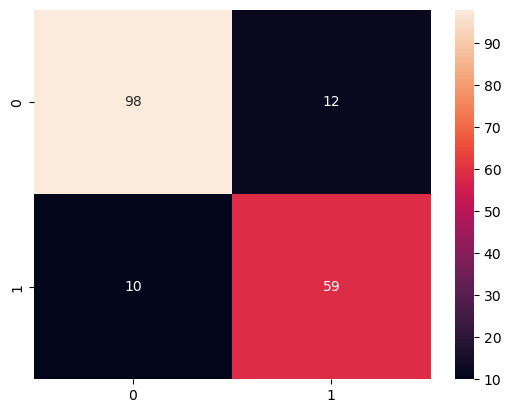

In [57]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [59]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()

In [60]:
tn

98

In [61]:
fp

12

In [62]:
fn

10

In [63]:
tp

59